# Student's $t$-distribution

**References:**
- https://en.wikipedia.org/wiki/Student%27s_t-distribution

> Any member of a family of continuous probability distributions that arises when estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown.

**Sample mean:**

\begin{equation}
    \bar{X}
    =
    \frac{1}{n} \sum_{i=1}^{n} X_{i}
\end{equation}

**Sample variance (Bessel-corrected):**

\begin{equation}
    S^{2}
    =
    \frac{1}{n-1}    
    \sum_{i=1}^{n}
    (X_{i} - \bar{X})^{2}
\end{equation}

**Truth standard deviation ($\sigma/\sqrt{n}$) normalized deviation of the sample mean:**

\begin{equation}
    Y_{true}
    = 
    \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
\end{equation}

**Sample standard deviation ($S/\sqrt{n}$) normalized deviation of the sample mean:**

\begin{equation}
    Y
    = 
    \frac{\bar{X} - \mu}{S / \sqrt{n}}
\end{equation}

In this case the $Y$ and $Y_{true}$ are distributed as:

\begin{equation}
    Y_{true}
    \sim
    Norm(0,1)
\end{equation}

\begin{equation}
    Y
    \sim
    f_{Student-t}(Y)
\end{equation}

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
def create_experiments(mean, sigma, sample_size, nExperiments=1):
    
    X = np.array([stats.norm.rvs(loc=mean, scale=sigma, size=sample_size) for i in range(nExperiments)])
    
    n = len(X[0])
    
    X_sample_means = X.mean(axis=1)
    X_sample_means_reshaped = X_sample_means.reshape(nExperiments,1)
    
    S = np.sum((X - X_sample_means_reshaped)**2, axis=1)/(n-1)
       
    Y      = (X_sample_means - mean)/(np.sqrt(S)/np.sqrt(n))
    Y_true = (X_sample_means - mean)/(sigma/np.sqrt(n))
    
    experiments = {}
    
    experiments['X'] = X
    experiments['X_sample_means'] = X_sample_means
    experiments['S'] = S
    experiments['Y'] = Y
    experiments['Y_true'] = Y_true
    
    return experiments

In [3]:
mean = 2.0
sigma = 1.0
sample_size = 10
nExperiments = 10000

In [4]:
nu = sample_size - 1

In [5]:
experiments = create_experiments(mean, sigma, sample_size, nExperiments)

In [6]:
x_grid = np.linspace(-5.0, 5.0, 100)

In [7]:
y_student = stats.t.pdf(x_grid, df=nu)
y_normal = stats.norm.pdf(x_grid, loc=0.0, scale=1.0)

In [8]:
S_x_grid = np.linspace(0.0, 10.0, 100)
S_chi2   = nu*stats.chi2.pdf(S_x_grid*nu, df=nu)

In [9]:
label_t_distr = r"t-distr, $\nu={}$".format(nu)

/home/edy/lib/build/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


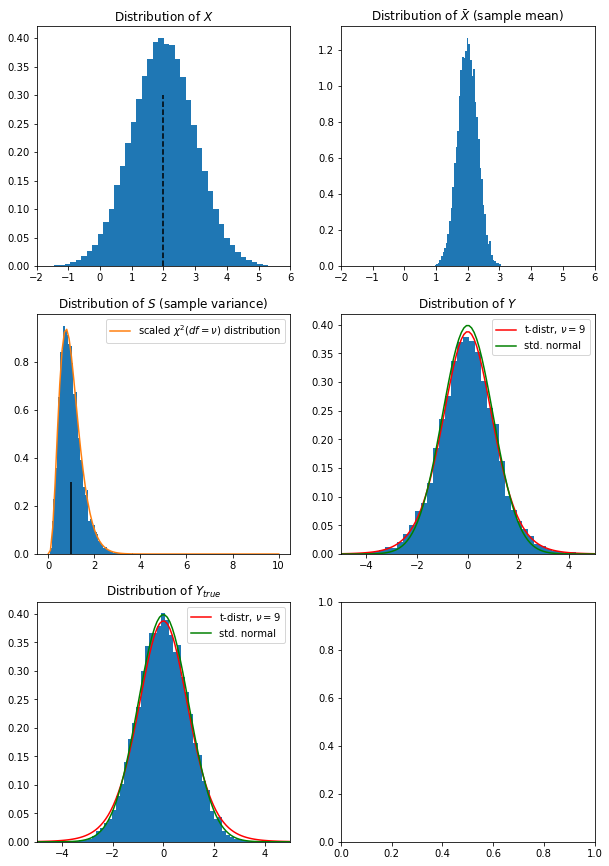

In [10]:
f,axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
axes = axes.flatten()

# - X
axes[0].hist(experiments['X'].flatten(), bins=50, normed=True);
axes[0].vlines(mean, 0.0, 0.3, linestyle='--')
axes[0].set_title(r'Distribution of $X$')

# - X sample mean
axes[1].hist(experiments['X_sample_means'], bins=50, normed=True);
axes[1].set_title(r'Distribution of $\bar{X}$ (sample mean)')

# - S
axes[2].hist(experiments['S'], bins=50, normed=True)
axes[2].set_title(r'Distribution of $S$ (sample variance)')
axes[2].vlines(experiments['S'].mean(), 0.0, 0.3, linestyle='-')
axes[2].plot(S_x_grid, S_chi2, label=r'scaled $\chi^{2}(df=\nu)$ distribution')

# - Y
axes[3].hist(experiments['Y'], bins=50, normed=True)
axes[3].plot(x_grid, y_student, c='r', label=label_t_distr)
axes[3].plot(x_grid, y_normal, c='g', label='std. normal')
axes[3].set_xlim(-5.0, 5.0)
axes[3].set_title(r'Distribution of $Y$')

# - Y true
axes[4].hist(experiments['Y_true'], bins=50, normed=True)
axes[4].plot(x_grid, y_student, c='r', label=label_t_distr)
axes[4].plot(x_grid, y_normal, c='g', label='std. normal')
axes[4].set_xlim(-5.0, 5.0)
axes[4].set_title(r'Distribution of $Y_{true}$')


axes[0].set_xlim(-2,6)
axes[1].set_xlim(-2,6)
for a in axes:
    a.legend()

## Test area

In [11]:
experiments = create_experiments(mean, sigma, sample_size, 1)

In [12]:
X = experiments['X']
X_sample_means = experiments['X_sample_means']
S = experiments['S']
Y = experiments['Y']
Y_true = experiments['Y_true']

In [13]:
X

array([[ 1.67339409,  2.86756568,  2.51457282,  2.28047942,  3.13602943,
         3.02216334,  1.25380702,  1.6239403 ,  1.28482628,  2.11515635]])

In [14]:
X_sample_means

array([ 2.17719347])

In [15]:
assert np.mean(X) == X_sample_means

In [16]:
np.mean(X - X_sample_means)

1.1102230246251565e-16

In [17]:
np.sum((X - X_sample_means)**2,axis=1)/4

array([ 1.11179008])

In [18]:
S

array([ 0.49412892])

In [19]:
Y

array([ 0.79712712])

In [20]:
(X_sample_means - 2.0)/(S/np.sqrt(5))

array([ 0.80184874])

----------------

In [21]:
M = np.array([[1,2],[-1, 1]])

In [22]:
x = np.array([[1],[2]])

In [23]:
M.shape

(2, 2)

In [24]:
x.shape

(2, 1)

In [25]:
M

array([[ 1,  2],
       [-1,  1]])

In [26]:
x

array([[1],
       [2]])

In [27]:
M - x

array([[ 0,  1],
       [-3, -1]])

In [28]:
np.mean(x, axis=1)

array([ 1.,  2.])

In [29]:
mean = 3.0
sigma = 2.4

In [30]:
Xs = stats.norm.rvs(loc=mean, scale=sigma, size=50)

In [31]:
n = len(Xs)

In [32]:
X_sample_mean = np.mean(Xs)

In [33]:
S = np.sum( (Xs - X_sample_mean)**2 )
S_normed = S/(n-1)

In [34]:
Y = X_sample_mean